# Predicting medical expenses

## USA patients demographic information
### Uses the dataset *medical_expenses.csv*

This notebook is an example. It does not show an exhaustive detail on all CRISP-DM phases.

(c) Nuno António 2020-2023 - Rev. 1.04

### Dataset description
Simulated dataset containing medical expenses for patients in the United States. These data were created for the book "Machine Learning with R" (Lantz, B., 2013) using demographic statistics from the U.S. Census Bureau.<br>
The variables included in this dataset are:<br>
- **age**: integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).
- **sex**: policy holder's gender, either male or female.
- **bmi**: body mass index (BMI), which provides a sense of how over or under-weight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.
- **children**: integer indicating the number of children / dependents covered by the insurance plan.
- **smoker**: yes or no depending on whether the insured regularly smokes tobacco.
- **region**: beneficiary's place of residence in the U.S., divided into four geographic regions: northeast, southeast, southwest, or northwest.
- **charges**: the total medical expenses charged to the plan for the calendar year.

#Business problem
For an insurance company to make money, it needs to collect more in
yearly premiums than it spends on medical care to its beneficiaries. As a
result, insurers invest a great deal of time and money to develop models
that accurately forecast medical expenses.
Medical expenses are difficult to estimate because the costliest
conditions are rare and seemingly random. Still, some conditions are more
prevalent for certain segments of the population. For instance, lung
cancer is more likely among smokers than non-smokers, and heart disease
may be more likely among the obese.

#Business objective
Estimate the medical care expenses per individual. These estimates
could be used to create actuarial tables which set the price of yearly
premiums higher or lower depending on the expected treatment
costs
Understanding key drivers of the estimates

Q1: From these variables which should be the target variable?

### Initial setup and modules/packages loading

In [ ]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns

### Data understanding

In [ ]:
# Load data
ds = pd.read_csv('medical_expenses.csv', sep=',')
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There is no missing value which is good.

Since most machine learning models require numerical input, we need to convert categorical variables like sex, smoker, and region into numeric format. We use Label Encoding for binary variables and One-Hot Encoding for variables with more than two categories. This allows the models to process all features correctly.

In [ ]:
# Display top 15 rows
ds.head(15)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
# Summary statistics
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


* age: Ages range from 18 to 64, with a mean and median of 39, suggesting a
balanced distribution.
* bmi: The average BMI is around 30.66, which borders on obesity. The maximum value (53.13) indicates potential outliers and severe obesity.
* children: The average number of children is 1.1, with a median of 1 and a 75th percentile of 2, meaning most individuals have between 0 and 2 children.
* charges: The average medical expense is ~$13,270, while the median is $9,382. The high maximum value ($63,770) suggests a right-skewed distribution with a few individuals incurring very high costs.

In [ ]:
# Summary statistics for all variables - Transpose
ds.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1338.0,NaN,NaN,NaN,39.207025,14.04996,18.0,27.0,39.0,51.0,64.0
sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1338.0,NaN,NaN,NaN,30.663397,6.098187,15.96,26.29625,30.4,34.69375,53.13
children,1338.0,NaN,NaN,NaN,1.094918,1.205493,0.0,0.0,1.0,2.0,5.0
smoker,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1338,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1338.0,NaN,NaN,NaN,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Q2: Do numeric variables statistics show any strange patterns?

In [ ]:
# Confirm that there are not any missing values
print(ds.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [ ]:
# Transform a list of columns to categorical
cols = ['sex', 'smoker', 'region']
ds[cols] = ds[cols].apply(lambda x:x.astype('category'))

In [ ]:
# Counts per category level
ds['sex'].value_counts()

,count
sex,
male,676
female,662


In [ ]:
# Ckeck the top counts of all categorical variables
categorical=ds.select_dtypes(exclude=["number","bool_","object_"]).columns.tolist()
categorical
for var in ds[categorical]:
    print(var,":\n",ds[var].value_counts(), sep="")

sex:
sex
male      676
female    662
Name: count, dtype: int64
smoker:
smoker
no     1064
yes     274
Name: count, dtype: int64
region:
region
southeast    364
northwest    325
southwest    325
northeast    324
Name: count, dtype: int64


sex: The distribution between males (676) and females (662) is fairly balanced, with no significant gender skew.
smoker: There are significantly more non-smokers (1064) than smokers (274), indicating that smoking is relatively uncommon in the dataset.
region: The regional distribution is quite even, though the southeast has a slightly higher number of observations (364).

In [ ]:
# Exploration of categorical variables: cross table of region and smoker
tb1 = pd.crosstab(index=ds['region'], columns=ds['smoker'])
tb1

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


<Axes: xlabel='region'>

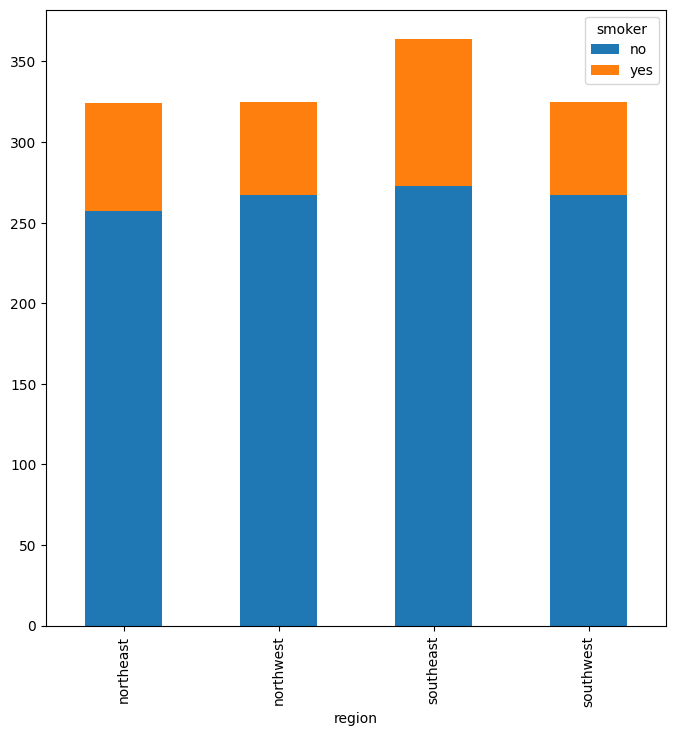

In [ ]:
# Visual exploration of the cross table
tb1.plot(kind="bar", figsize=(8,8), stacked=True)

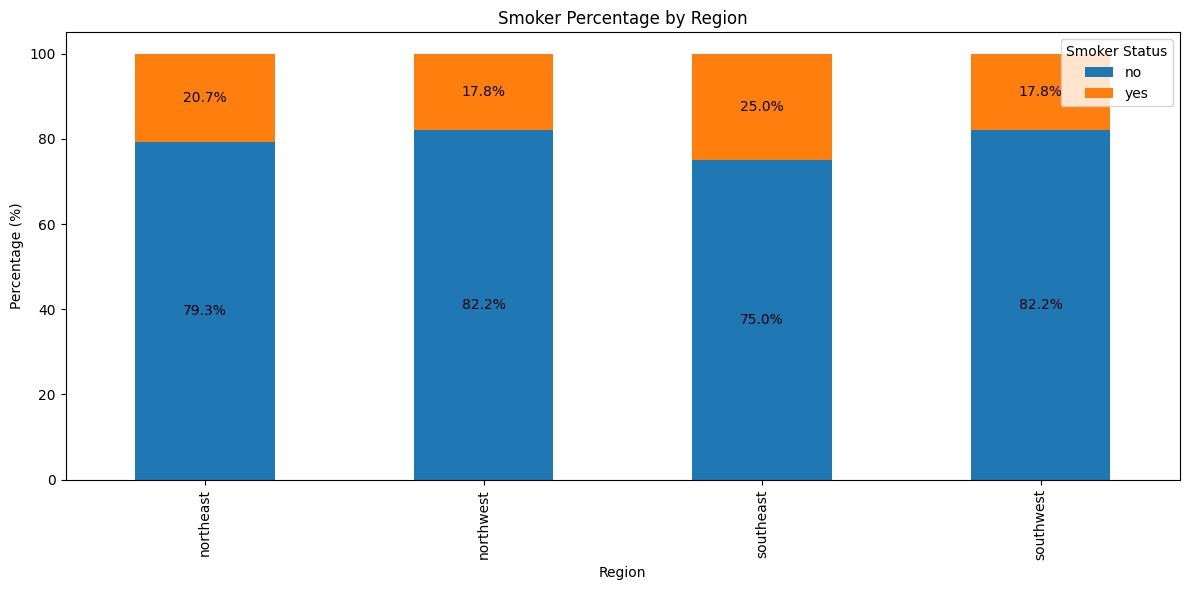

In [29]:
# Create a cross-tabulation table showing the percentage of smokers by region
tb1 = pd.crosstab(ds['region'], ds['smoker'], normalize='index') * 100

# Plot the stacked bar chart
ax = tb1.plot(kind="bar", figsize=(12, 6), stacked=True)

# Add percentage labels to each bar segment
for container in ax.containers:
    labels = [f'{v.get_height():.1f}%' if v.get_height() > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center')

# Add chart title and axis labels
plt.title("Smoker Percentage by Region")
plt.ylabel("Percentage (%)")
plt.xlabel("Region")

# Add legend with a title and position it at the upper right
plt.legend(title="Smoker Status", loc="upper right")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Q3: Is there any pattern regarding region and smoking habits?
C1: Explore other categorical variables relationships



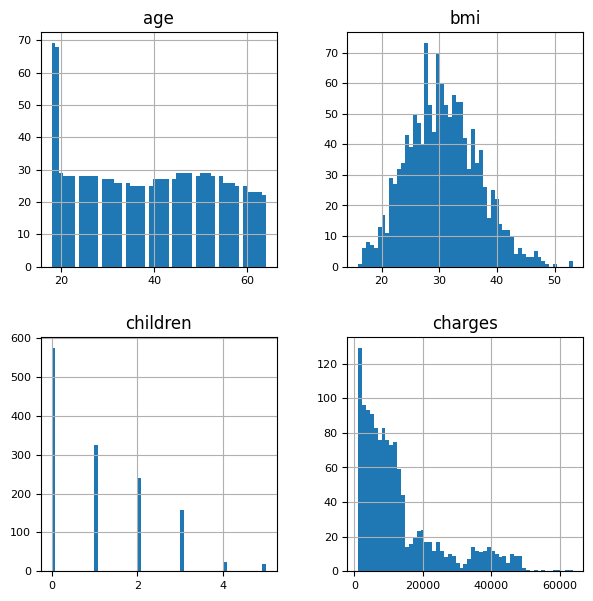

In [31]:
# Do histograms on all numeric variables
numerical=ds.select_dtypes(include=[np.number]).columns.tolist()
ds[numerical].hist(bins=55, figsize=(7, 7), layout=(2, 2), xlabelsize=8, ylabelsize=8);

Q4: What type of distributions are distributions problems are there?<br>C2: Explore histograms shapes with different bin sizes


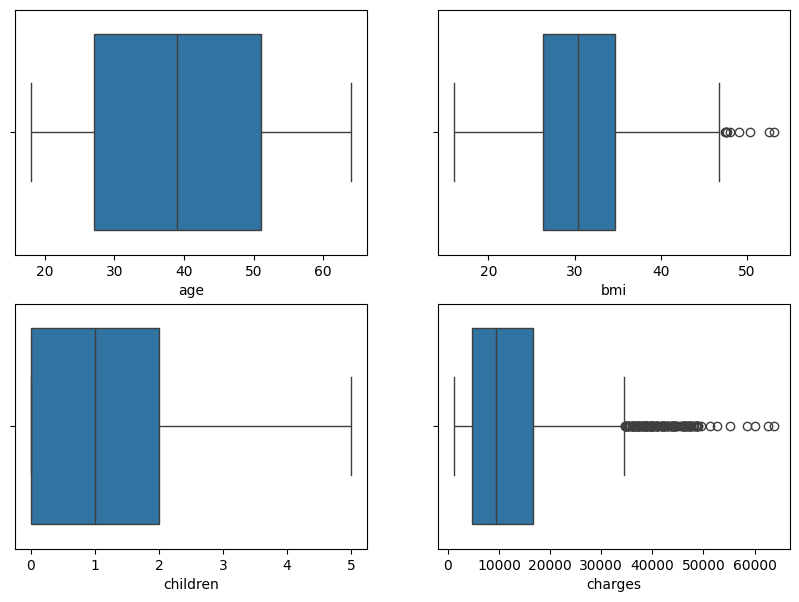

In [ ]:
# Do boxplots on all numeric variables
fig, ax = plt.subplots(2, 2, figsize=(10, 7))
for var, subplot in zip(ds[numerical], ax.flatten()):
    sns.boxplot(x=ds[var], ax=subplot)


Q5: Does the boxplots show any interesting patterns?


Yes, the boxplots reveal several interesting patterns:

BMI and charges have multiple outliers on the higher end, indicating a right-skewed distribution.
Charges shows a large spread and extreme values, suggesting that a small group of individuals incur very high medical expenses.
Age and children appear more symmetrically distributed with no significant outliers.
These patterns suggest potential data transformations (e.g., log transformation for charges) and highlight which features might strongly influence prediction models.

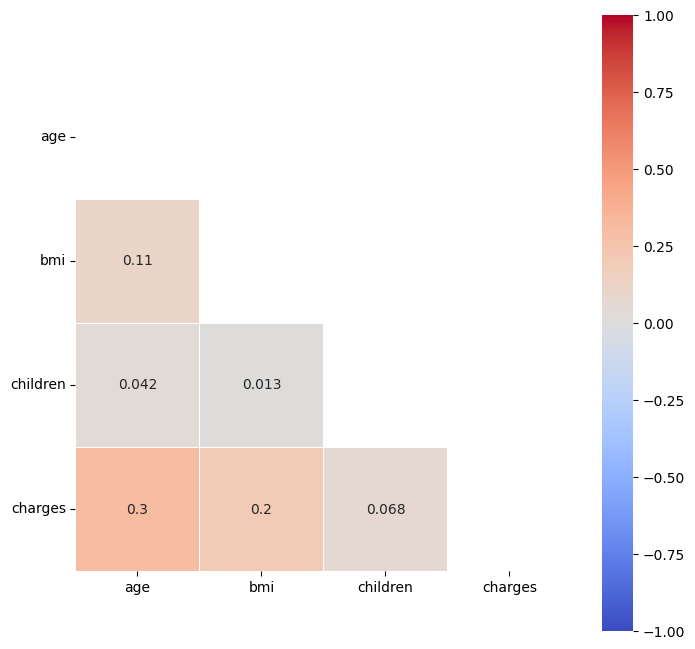

In [ ]:
corr = ds[numerical].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(8, 8))
heatmap = sns.heatmap(corr,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 10})

#add the column names as labels
ax.set_yticklabels(corr.columns, rotation = 0)
ax.set_xticklabels(corr.columns, rotation = 0)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

#correct first and last line plot (bug on previous versions of Seaborn)
#bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top - 0.5)

Q6: Are there any relevant correlations?



Yes, the heatmap reveals a few weak to moderate correlations:

* **Age and Charges (0.30)**: There is a moderate positive correlation — older individuals tend to have higher medical expenses.
* **BMI and Charges (0.20)**: A weak positive correlation — higher BMI is somewhat associated with higher costs.
* **Children and Charges (0.07)**: Very weak correlation — number of dependents doesn’t significantly influence expenses.
* Other correlations between predictors themselves (like `age` and `bmi`) are very low, suggesting low multicollinearity.

🔎 **Conclusion**: While no strong linear correlations exist, **age** and **BMI** show the most potential for influencing medical charges and may be more impactful when interacting with other variables (like smoking status).


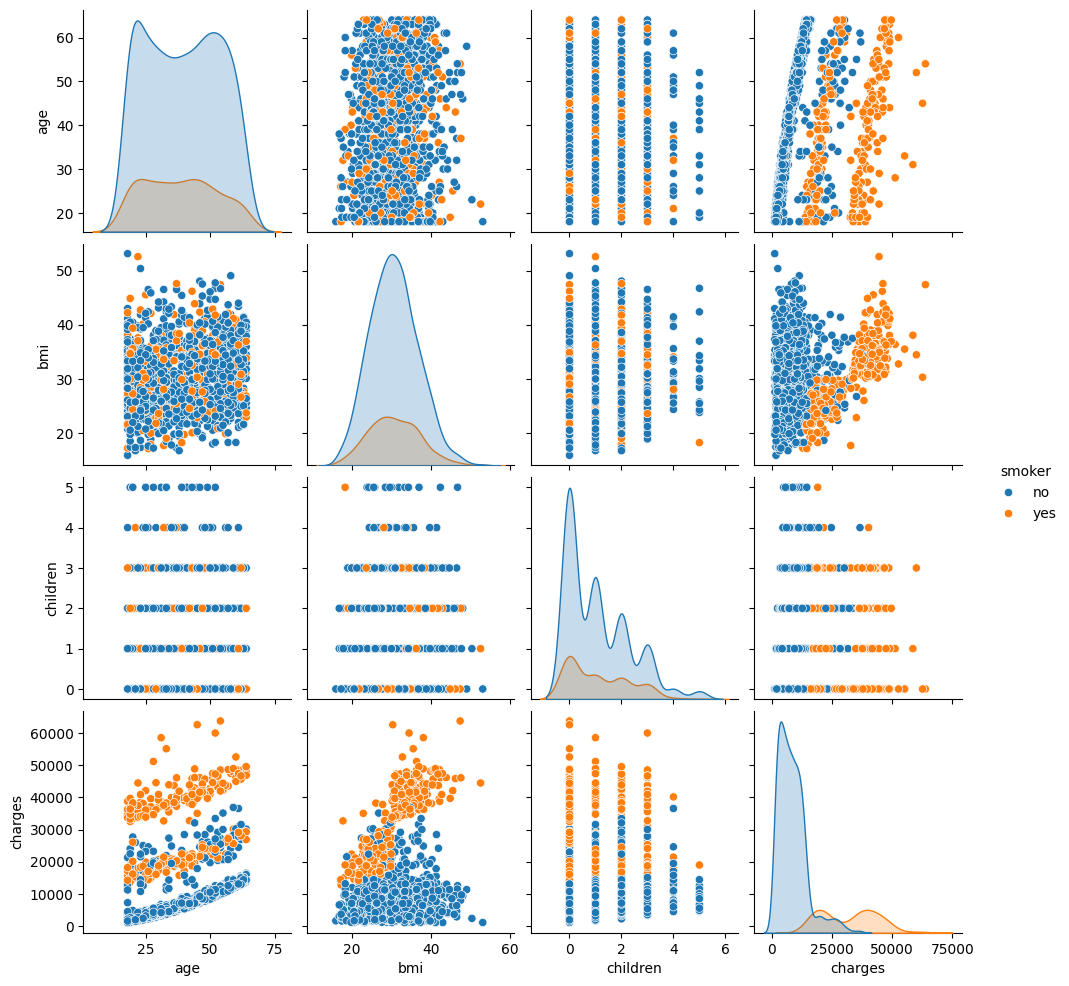

In [ ]:
# Pair plot some of the numerical variables with Smoker
cols=['age','bmi','children','charges','smoker']
g = sns.pairplot(ds[cols], hue="smoker")

Q7: Are there any relevant patterns?<br>
C3: Change pairplot parameters to explore the relationship between other variables

Yes, several important patterns are visible in the pairplot:

Smoker status is the most visually distinctive factor. Smokers (orange points) clearly have much higher charges, especially when BMI is also high.
Charges vs. Age: Smokers tend to incur higher medical expenses at nearly all age levels — two visible "bands" indicate distinct cost levels between smokers and non-smokers.
Charges vs. BMI: Smokers with higher BMI have significantly higher medical costs; this suggests a possible interaction effect between bmi and smoker.
Children and BMI vs. Charges show less defined trends — those relationships appear weak or noisy.

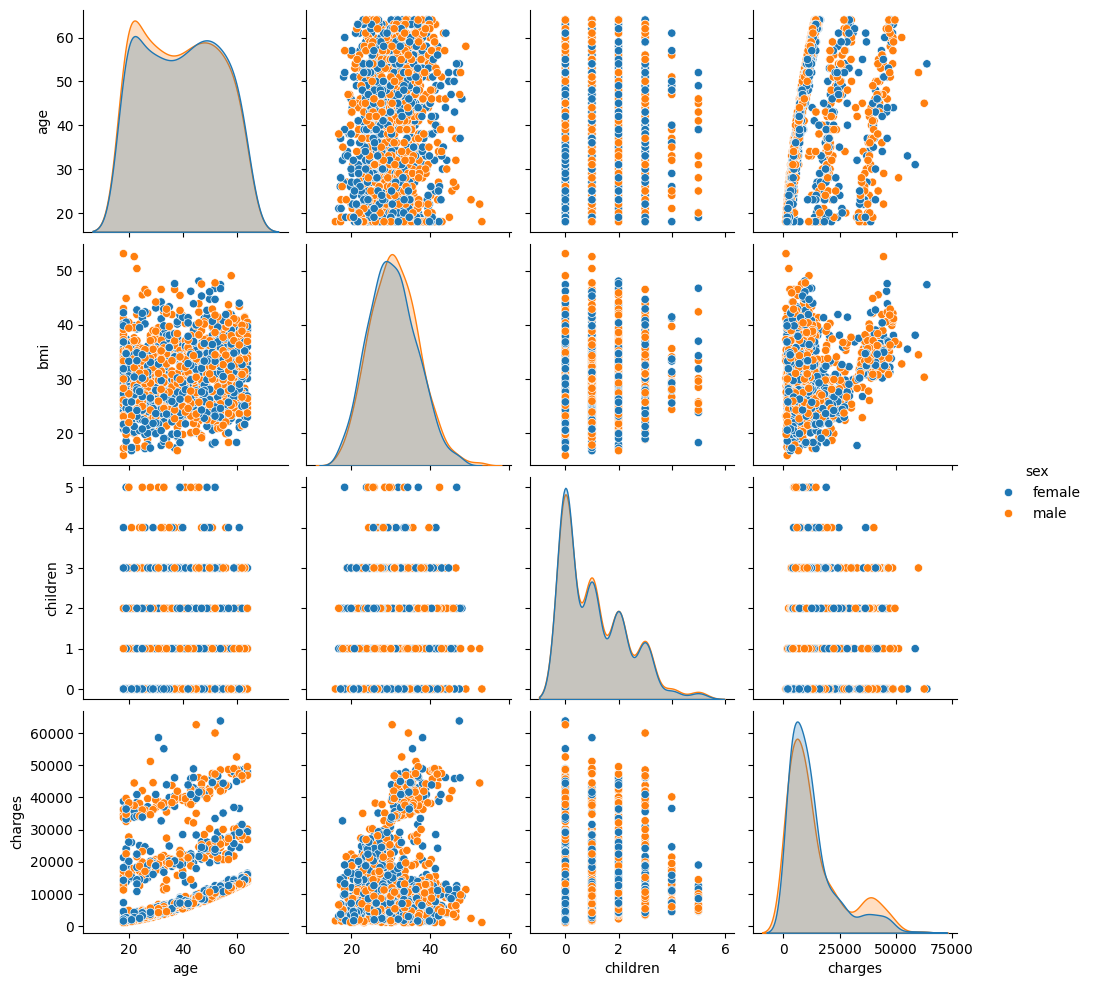

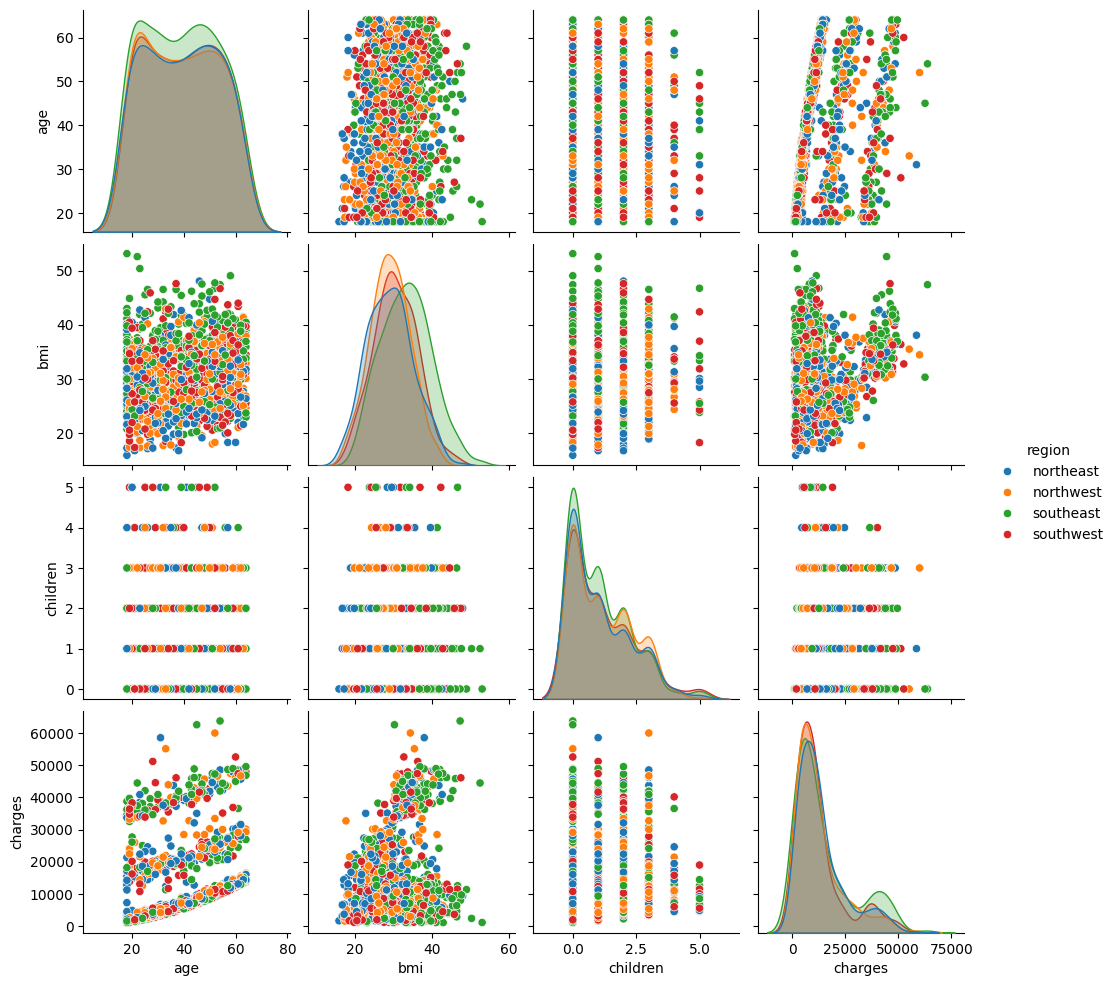

In [34]:
sns.pairplot(ds, hue='sex')              # to see if gender plays a role
sns.pairplot(ds, hue='region')           # to explore regional patterns
     # cleaner lower triangle


# Model

In [36]:
# Basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline




#2. Preprocessing Pipeline

In [37]:
# Define categorical and numerical features
categorical = ['sex', 'smoker', 'region']
numerical = ['age', 'bmi', 'children']

# ColumnTransformer to encode categorical features and keep numerical ones
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), categorical)
], remainder='passthrough')


#3. Train-Test Split

In [38]:
# Feature/target split
X = ds.drop("charges", axis=1)
y = ds["charges"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



#4. Model Training & Evaluation


In [41]:
# Define models to compare
models = {
    "Linear Regression": Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]),
    "Random Forest": Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(random_state=42))
    ])
}

# Train, predict and evaluate each model
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append({
    "Model": name,
    "MAE": mean_absolute_error(y_test, y_pred),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
    "R² Score": r2_score(y_test, y_pred)
})


# Show results
results_ds = pd.DataFrame(results)
results_ds.sort_values(by="R² Score", ascending=False)



,Model,MAE,RMSE,R² Score
1,Random Forest,2554.377759,4581.114618,0.864819
0,Linear Regression,4181.194474,5796.284659,0.783593


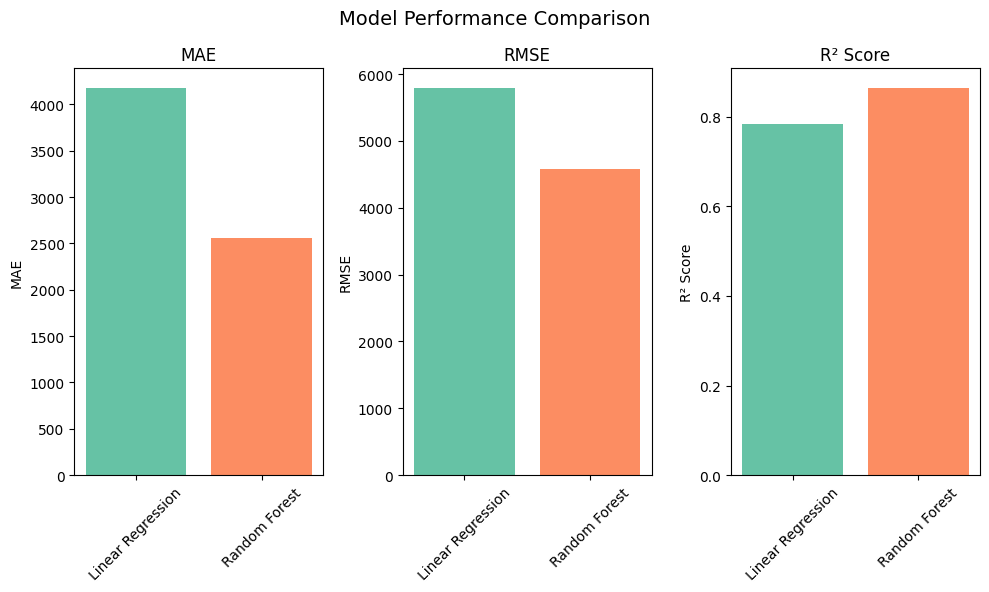

In [43]:
# Visual comparison of model metrics
import matplotlib.pyplot as plt

# Make sure results_df exists
metrics = ['MAE', 'RMSE', 'R² Score']

plt.figure(figsize=(10, 6))
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i + 1)
    plt.bar(results_ds['Model'], results_ds[metric], color=['#66c2a5', '#fc8d62'])
    plt.title(metric)
    plt.ylabel(metric)
    plt.xticks(rotation=45)

plt.suptitle("Model Performance Comparison", fontsize=14)
plt.tight_layout()
plt.show()


<ipython-input-44-34d33f2134d1>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importance.values, y=feat_importance.index, palette="viridis")


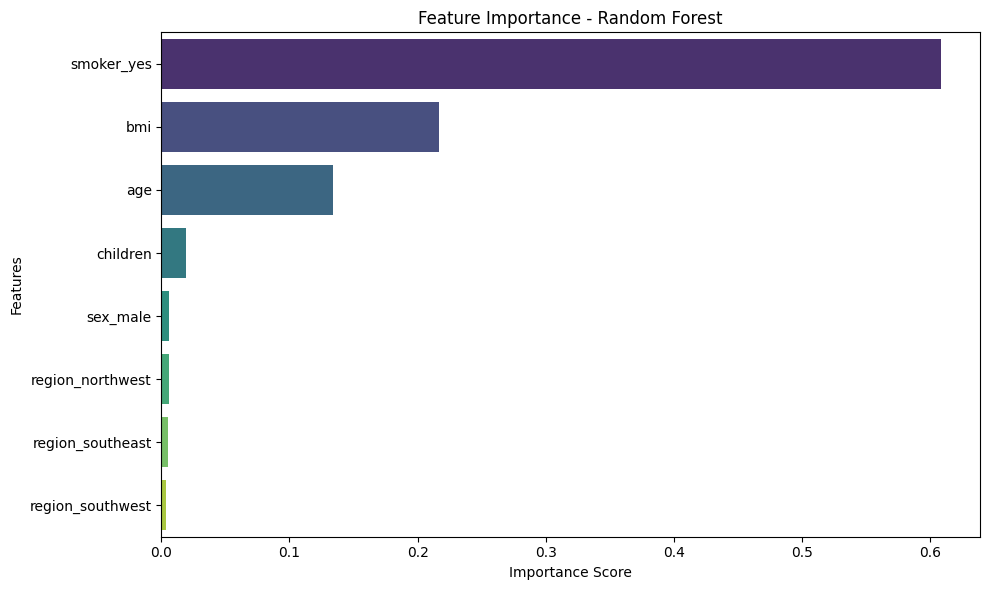

In [44]:
# Access trained Random Forest model and feature names
rf_pipeline = models["Random Forest"]
rf_model = rf_pipeline.named_steps["regressor"]

# Get feature names from preprocessor
encoded_features = rf_pipeline.named_steps["preprocessor"].transformers_[0][1].get_feature_names_out(categorical)
all_features = list(encoded_features) + numerical

# Feature importance plot
importances = rf_model.feature_importances_
feat_importance = pd.Series(importances, index=all_features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importance.values, y=feat_importance.index, palette="viridis")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


The Random Forest model suggests that 'smoker' and 'age' are the most important features in predicting medical expenses.



#🔍 Interpretation:
Random Forest clearly outperforms Linear Regression across all metrics.
The lower MAE and RMSE values indicate that Random Forest makes smaller prediction errors on average.
The higher R² Score (0.86) means that Random Forest explains more variance in the charges data, capturing nonlinear relationships and interactions better.